# View images for representative classifiers
Author: Jess Ewald

Sam Chen ran classifiers for all of the 1% (batch 7 and 8). Here, we read in all of the results and view images for comparisons that we care about to make sure that the classifier results make sense. 

In [1]:
# Imports
import polars as pl
import numpy as np
from sh import aws
import os
from skimage.io import imread
from matplotlib import pyplot as plt
import matplotlib as mpl

import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

import warnings
warnings.filterwarnings("ignore")

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

In [2]:
sam_res_dir = "/dgx1nas1/storage/data/sam/codes/2021_09_01_VarChAMP/6.downstream_analysis_snakmake/outputs/results"
result_file = "profiles_tcdropped_filtered_var_mad_outlier_featselect/result.csv"

batch7 = pl.read_csv(f"{sam_res_dir}/2024_01_23_Batch_7/{result_file}").with_columns(pl.lit("batch7").alias("Batch"))
batch8 = pl.read_csv(f"{sam_res_dir}/2024_02_06_Batch_8/{result_file}").with_columns(pl.lit("batch8").alias("Batch"))

res = pl.concat([batch7, batch8])

In [4]:
# calculate coefficient of variation for each comparison within each batch

cov = res.group_by(["Batch", "Group2"]).agg([
    pl.col("PR_AUC").std().alias("std_dev"),
    pl.col("PR_AUC").mean().alias("mean")
]).with_columns(
    (pl.col("std_dev") / pl.col("mean")).alias("cov")
)

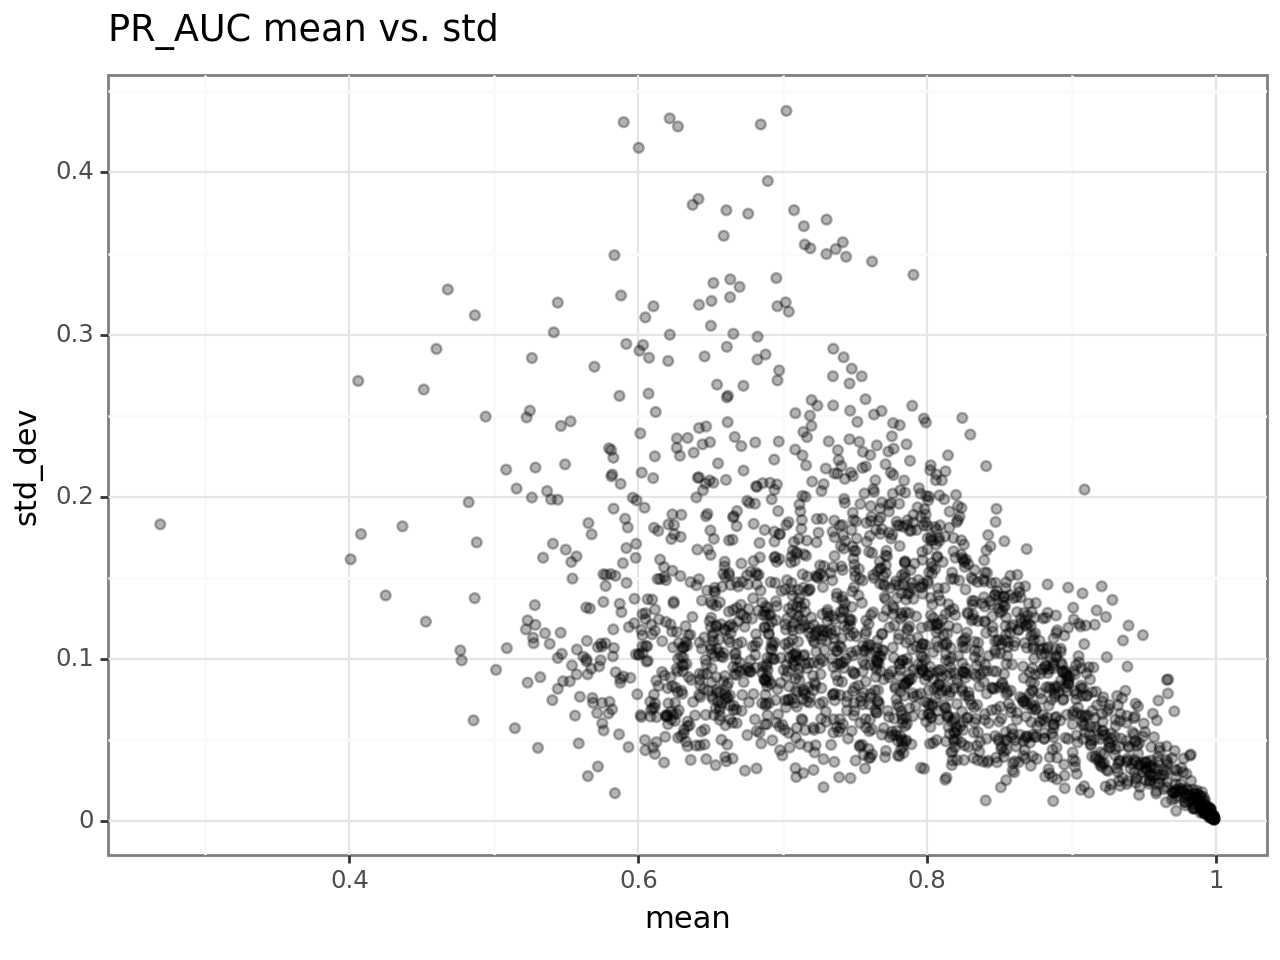

In [8]:
from plotnine import ggplot, aes, geom_point, theme_bw, ggtitle

plot1 = (ggplot(cov)
         + aes(x = "mean", y = "std_dev")
         + geom_point(alpha=0.3) + theme_bw() + ggtitle("PR_AUC mean vs. std"))
print(plot1)

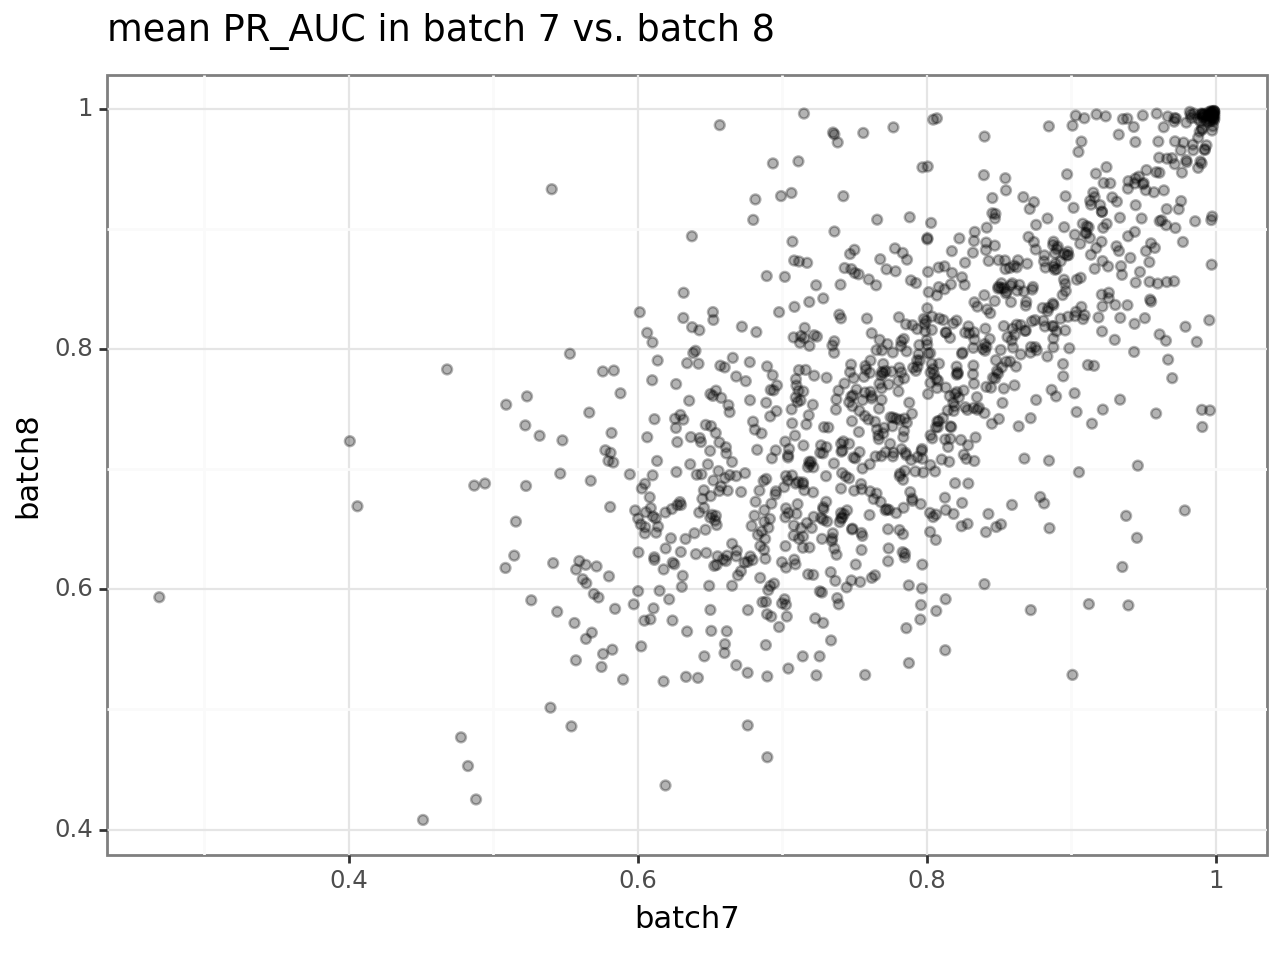

In [10]:
# Compare batch 7 and 8 results (mean PR AUC)

cov_batch = cov.pivot(index="Group2", columns="Batch", values="mean")

plot1 = (ggplot(cov_batch)
         + aes(x = "batch7", y = "batch8")
         + geom_point(alpha=0.3) + theme_bw() + ggtitle("mean PR_AUC in batch 7 vs. batch 8"))
print(plot1)

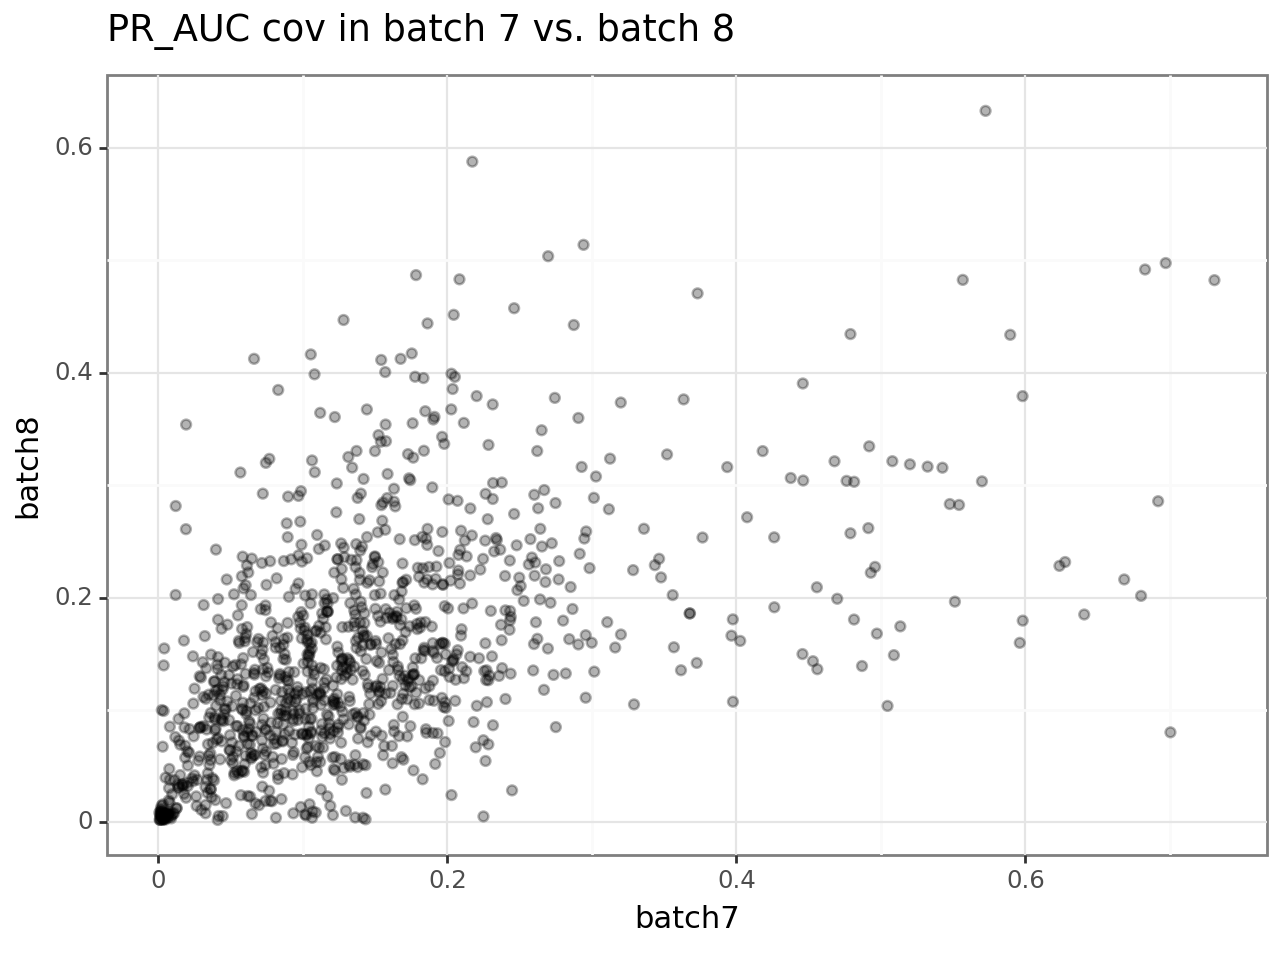

In [11]:
# Compare batch 7 and 8 results (PR AUC cov)

cov_batch = cov.pivot(index="Group2", columns="Batch", values="cov")

plot1 = (ggplot(cov_batch)
         + aes(x = "batch7", y = "batch8")
         + geom_point(alpha=0.3) + theme_bw() + ggtitle("PR_AUC cov in batch 7 vs. batch 8"))
print(plot1)

In [ ]:
# calulate cell count info
